## Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [40]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
#Importing dataset
from google.colab import files
uploaded = files.upload()

import io
media = pd.read_csv(io.BytesIO(uploaded['mediacompany.csv']))

media = media.drop('Unnamed: 7',axis = 1)

ModuleNotFoundError: No module named 'google.colab'

In [42]:
#Let's explore the top 5 rows
media.head()

NameError: name 'media' is not defined

In [43]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

NameError: name 'media' is not defined

In [44]:
media.head()

NameError: name 'media' is not defined

In [45]:
# Deriving "days since the show started"
from datetime import date

d0 = pd.Timestamp('2017-02-28 00:00:00', tz=None)
#d0 = date(2017, 2, 28)
d1 = media.Date

print(type(d0))
print(type(d1[0]))


NameError: name 'media' is not defined

In [46]:
delta = d1 - d0
media['day']= delta


NameError: name 'd1' is not defined

In [47]:
media.head()

NameError: name 'media' is not defined

In [48]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

NameError: name 'media' is not defined

In [49]:
media.head()

NameError: name 'media' is not defined

In [50]:
# days vs Views_show
media.plot.line(x='day', y='Views_show')

NameError: name 'media' is not defined

In [51]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'media' is not defined

NameError: name 'media' is not defined

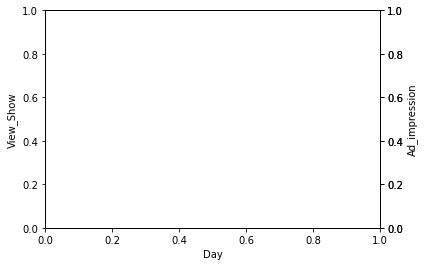

In [52]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [53]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

NameError: name 'media' is not defined

#### Running first model (lm1) Weekday & visitors 

In [54]:
# Putting feature variable to X
X = media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [57]:
# fit the model to the training data
lm.fit(X,y)

NameError: name 'X' is not defined

In [58]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

NameError: name 'X' is not defined

In [59]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

NameError: name 'media' is not defined

In [60]:
media.head()


NameError: name 'media' is not defined

#### Running second model (lm2) visitors & weekend

In [61]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [62]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

NameError: name 'X' is not defined

#### Running third model (lm3) visitors, weekend & Character_A

In [63]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [64]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

NameError: name 'X' is not defined

In [65]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

NameError: name 'media' is not defined

In [66]:
media.head()

NameError: name 'media' is not defined

#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [67]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [68]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

NameError: name 'X' is not defined

In [69]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(media.corr(),annot = True)

NameError: name 'media' is not defined

<Figure size 1440x720 with 0 Axes>

#### Running fifth model (lm5) Character_A, weekend & Views_platform

In [70]:
# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [71]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())

NameError: name 'X' is not defined

#### Running sixth model (lm6) Character_A, weekend & Visitors

In [72]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [20]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())

NameError: name 'X' is not defined

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [21]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [22]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y,X).fit()
print(lm_7.summary())

NameError: name 'X' is not defined

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [23]:
# Putting feature variable to X
X = media[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [24]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

NameError: name 'X' is not defined

In [25]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

NameError: name 'media' is not defined

#### Running seventh model (lm7) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [26]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [27]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y,X).fit()
print(lm_9.summary())

NameError: name 'X' is not defined

#### Running seventh model (lm7) Character_A, weekend & ad_impressions_million

In [28]:
# Putting feature variable to X
X = media[['weekend','Character_A','ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

NameError: name 'media' is not defined

In [29]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_10 = sm.OLS(y,X).fit()
print(lm_10.summary())

NameError: name 'X' is not defined

#### Making predictions using lm10

In [30]:
# Making predictions using the model
X = media[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

NameError: name 'media' is not defined

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

NameError: name 'media' is not defined

In [32]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

NameError: name 'mse' is not defined

In [33]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

NameError: name 'media' is not defined

<Figure size 432x288 with 0 Axes>

In [34]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

NameError: name 'media' is not defined

<Figure size 432x288 with 0 Axes>

#### Making predictions using lm6

In [35]:
# Making predictions using the model
X = media[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

NameError: name 'media' is not defined

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

NameError: name 'media' is not defined

In [37]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

NameError: name 'mse' is not defined

In [38]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

NameError: name 'media' is not defined

<Figure size 432x288 with 0 Axes>

In [39]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

NameError: name 'media' is not defined

<Figure size 432x288 with 0 Axes>